# Handwritten Digit Recognition
- Author = Amitrajit Bose
- Dataset = MNIST
- [Medium Article Link](https://medium.com/@amitrajit_bose/handwritten-digit-mnist-pytorch-977b5338e627)
- Frameworks = PyTorch


### Necessary Imports

In [17]:
# Import necessary packages
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time

In [18]:
import os
from google.colab import drive

ModuleNotFoundError: No module named 'google.colab'

### Download The Dataset & Define The Transforms

In [19]:
### Run this cell

from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('drive/My Drive/mnist/MNIST_data/', download=True, train=True, transform=transform)
valset = datasets.MNIST('drive/My Drive/mnist/MNIST_data/', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

### Exploring The Data

In [20]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


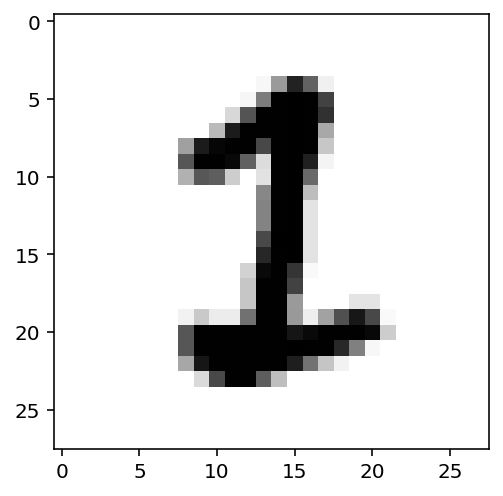

In [148]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

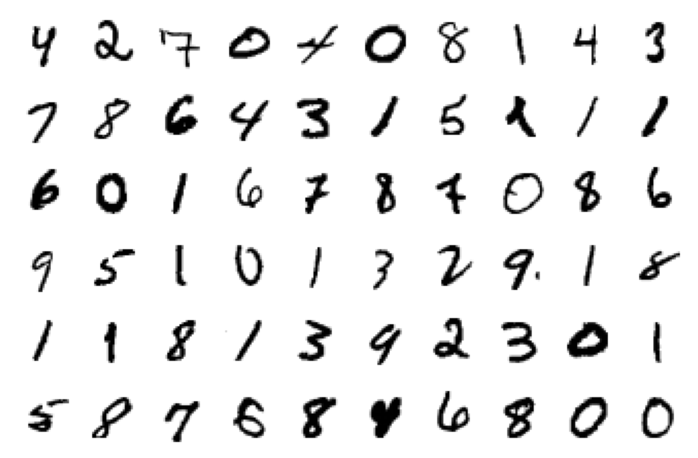

In [22]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

### Defining The Neural Network

![](https://raw.githubusercontent.com/dmlc/web-data/master/mxnet/image/mlp_mnist.png)

In [23]:
from torch import nn

# Layer details for the neural network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)


In [24]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images)
loss = criterion(logps, labels)

In [25]:
print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 0.0010,  0.0010,  0.0010,  ...,  0.0010,  0.0010,  0.0010],
        [ 0.0009,  0.0009,  0.0009,  ...,  0.0009,  0.0009,  0.0009],
        [ 0.0026,  0.0026,  0.0026,  ...,  0.0026,  0.0026,  0.0026],
        ...,
        [ 0.0009,  0.0009,  0.0009,  ...,  0.0009,  0.0009,  0.0009],
        [-0.0048, -0.0048, -0.0048,  ..., -0.0048, -0.0048, -0.0048],
        [-0.0011, -0.0011, -0.0011,  ..., -0.0011, -0.0011, -0.0011]])


In [26]:
from torch import optim

# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

In [27]:
print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[-0.0277,  0.0233,  0.0336,  ...,  0.0042,  0.0097, -0.0067],
        [-0.0356,  0.0283,  0.0023,  ..., -0.0283,  0.0052,  0.0316],
        [ 0.0307, -0.0124,  0.0079,  ..., -0.0008,  0.0120,  0.0156],
        ...,
        [-0.0232,  0.0310, -0.0047,  ..., -0.0323, -0.0202,  0.0035],
        [-0.0038,  0.0177, -0.0293,  ..., -0.0229,  0.0333,  0.0190],
        [ 0.0136, -0.0019,  0.0019,  ..., -0.0047,  0.0050, -0.0004]],
       requires_grad=True)
Gradient - tensor([[ 0.0022,  0.0022,  0.0022,  ...,  0.0022,  0.0022,  0.0022],
        [-0.0005, -0.0005, -0.0005,  ..., -0.0005, -0.0005, -0.0005],
        [-0.0014, -0.0014, -0.0014,  ..., -0.0014, -0.0014, -0.0014],
        ...,
        [ 0.0007,  0.0007,  0.0007,  ...,  0.0007,  0.0007,  0.0007],
        [ 0.0019,  0.0019,  0.0019,  ...,  0.0019,  0.0019,  0.0019],
        [-0.0030, -0.0030, -0.0030,  ..., -0.0030, -0.0030, -0.0030]])


In [28]:
# Take an update step and few the new weights
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[-0.0277,  0.0233,  0.0336,  ...,  0.0042,  0.0096, -0.0068],
        [-0.0356,  0.0283,  0.0023,  ..., -0.0283,  0.0052,  0.0316],
        [ 0.0307, -0.0124,  0.0079,  ..., -0.0007,  0.0120,  0.0156],
        ...,
        [-0.0232,  0.0310, -0.0047,  ..., -0.0323, -0.0202,  0.0035],
        [-0.0038,  0.0177, -0.0293,  ..., -0.0229,  0.0333,  0.0190],
        [ 0.0136, -0.0018,  0.0019,  ..., -0.0046,  0.0051, -0.0004]],
       requires_grad=True)


### Core Training Of Neural Network

In [29]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)


Epoch 0 - Training loss: 0.639089287757111
Epoch 1 - Training loss: 0.2854409349450806
Epoch 2 - Training loss: 0.222916029961601
Epoch 3 - Training loss: 0.17879829171306288
Epoch 4 - Training loss: 0.15043692354724478
Epoch 5 - Training loss: 0.12831063876385246
Epoch 6 - Training loss: 0.11226090655398013
Epoch 7 - Training loss: 0.10089682049251028
Epoch 8 - Training loss: 0.0902197214185016
Epoch 9 - Training loss: 0.08078225931899348
Epoch 10 - Training loss: 0.07401360064270353
Epoch 11 - Training loss: 0.06802777669527559
Epoch 12 - Training loss: 0.061951705113377
Epoch 13 - Training loss: 0.05786882433494223
Epoch 14 - Training loss: 0.0538566466837899

Training Time (in minutes) = 5.162377572059631


In [150]:
i=0
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

(1, 28, 28)
35
Predicted Digit = 2


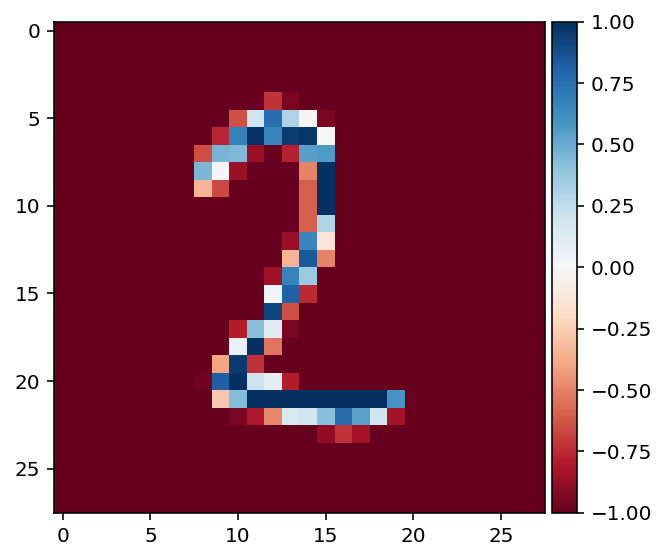

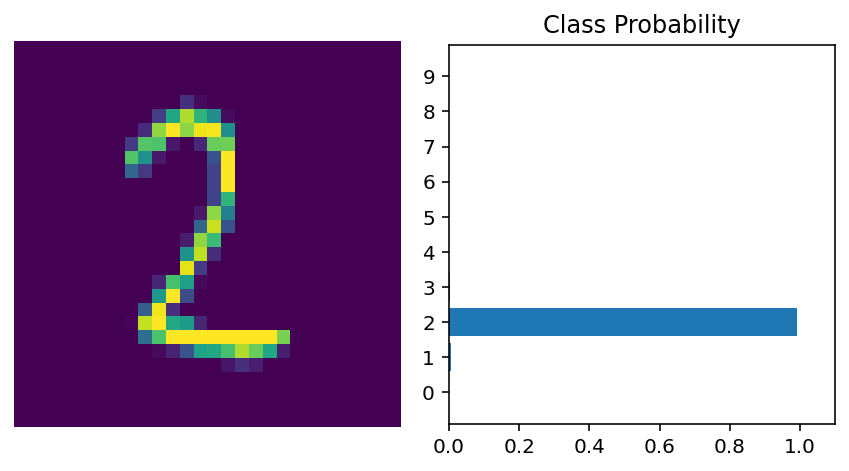

In [185]:
from skimage import io
from skimage.transform import rescale, resize
images, labels = next(iter(valloader))
i+=1
"""img = images[0].detach().numpy()"""

img = io.imread(str(26)+".png")
img = img/255 * 2 - 1
img2 = resize(img, (20,20))
img = -np.ones_like(img)
img[4:24,4:24] = img2
img = np.expand_dims(img, axis=0)
print(img.shape)
print(i)
io.imshow(img.squeeze())
img = torch.Tensor(img)
img = img.view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

### Model Evaluation

In [15]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    # Turn off gradients to speed up this part
    with torch.no_grad():
        logps = model(img)

    # Output of the network are log-probabilities, need to take exponential for probabilities
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

NameError: name 'valloader' is not defined

In [16]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
import os
from torchvision import datasets, transforms
from torch import nn
from torch import optim
import torch.nn.functional as F

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('drive/My Drive/mnist/MNIST_data/', download=True, train=True, transform=transform)
valset = datasets.MNIST('drive/My Drive/mnist/MNIST_data/', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)


# Layer details for the neural network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.lin1 = nn.Linear(784, 128)
        self.lin2 = nn.Linear(128, 64)
        self.lin3 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.lin1(x))
        x = F.relu(self.lin2(x))
        x = F.log_softmax(self.lin3(x), dim=1)
        return x


cnn = Model()
optimizer = optim.SGD(cnn.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15
criterion = nn.NLLLoss()

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = cnn(images)

        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))

torch.save(nn.state_dict(), "weights.pt")
print("\nTraining Time (in minutes) =",(time()-time0)/60)

KeyboardInterrupt: 